 # IBM Data Science Applied Capstone Project -Notebook

## Business Problem :

Relocation is always a difficult task when we have to select between the cities. It is always a good idea to gather some information about the place you are planning to move and check if it is similar to your liking. Some initial survey greatly helps in taking the decision of whether should consider moving to that place or not. Everyone has a different criteria to define the best place they want to live in. for example- Best schools nearby, low crime rate, housing prices etc.

The city under consideration for analysis is San Diego CA. San Diego is a city in the U.S. state of California. It is in San Diego County, on the coast of the Pacific Ocean in Southern California, approximately 120 miles south of Los Angeles and immediately adjacent to the border with Mexico. San Diego has been called "the birthplace of California". San Diego is the eighth-largest city in the United States and second-largest in California.




## Proposed Approach:
We are going to analyze following factors that will give us a general idea about the city of San Diego. 

1.	Geography
2.	Demographics
3.	Crime Rate 
4.	Neighborhood Exploration



## Datsets:

1.	https://en.wikipedia.org/wiki/San_Diego
2.	https://www.sandag.org/index.asp?classid=14&subclassid=21&projectid=446&fuseaction=projects.detail
3.	https://simplemaps.com/data/us-cities



The data from above datasets will be used for analysis of the major components involved in making the relocation decision . It will give us an insights about the population distribution, Crime rate statistics, and exploration of the neighborhood.


## Goal
The goal is to help people who are considering moving to San Diego and help them in deciding whether the city is similar to their liking or not and if it interests them enough to settle in .

In [195]:
import pandas as pd 
import numpy as np
print('Libraries imported.')

Libraries imported.


In [196]:
df = pd.read_csv('uscitiesv1.5.csv')
print('The dataframe has', df.shape, 'rows and columns.')
df.head()

The dataframe has (37842, 16) rows and columns.


,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id
0,Prairie Ridge,Prairie Ridge,WA,Washington,53053,Pierce,47.1443,-122.1408,NaN,NaN,1349.8,polygon,False,America/Los_Angeles,98360 98391,1840037882
1,Edison,Edison,WA,Washington,53057,Skagit,48.5602,-122.4311,NaN,NaN,127.4,polygon,False,America/Los_Angeles,98232,1840017314
2,Packwood,Packwood,WA,Washington,53041,Lewis,46.6085,-121.6702,NaN,NaN,213.9,polygon,False,America/Los_Angeles,98361,1840025265
3,Wautauga Beach,Wautauga Beach,WA,Washington,53035,Kitsap,47.5862,-122.5482,NaN,NaN,261.7,point,False,America/Los_Angeles,98366,1840037725
4,Harper,Harper,WA,Washington,53035,Kitsap,47.5207,-122.5196,NaN,NaN,342.1,point,False,America/Los_Angeles,98366,1840037659


### we will create our new dataframe which shows us only the cities in California.

In [197]:
import warnings
warnings.filterwarnings('ignore')

In [198]:
CA_data = df[df.state_id == 'CA']
CA_data.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id
15429,La Quinta,La Quinta,CA,California,6065,Riverside,33.6536,-116.2785,41304.0,41304.0,452.0,polygon,True,America/Los_Angeles,92253 92202 92247 92248,1840020559
15430,Saint Helena,Saint Helena,CA,California,6055,Napa,38.5044,-122.4681,7168.0,6196.0,479.0,polygon,True,America/Los_Angeles,94574,1840021486
15431,Burney,Burney,CA,California,6089,Shasta,40.8846,-121.6691,NaN,NaN,891.1,polygon,False,America/Los_Angeles,96013,1840017491
15432,Kensington,Kensington,CA,California,6013,Contra Costa,37.9084,-122.2805,NaN,NaN,1849.8,polygon,False,America/Los_Angeles,94708 94707,1840017613
15433,Upper Lake,Upper Lake,CA,California,6033,Lake,39.1653,-122.9052,NaN,NaN,413.6,polygon,False,America/Los_Angeles,95485,1840018805


In [199]:
CA_data.rename(columns={'city': 'Neighborhood','state_id': 'State', 'state_name':'Name', 'county_name':'County', 'lat': 'Latitude', 'lng': 'Longitude'}, inplace=True)
CA_data.head()

,Neighborhood,city_ascii,State,Name,county_fips,County,Latitude,Longitude,population,population_proper,density,source,incorporated,timezone,zips,id
15429,La Quinta,La Quinta,CA,California,6065,Riverside,33.6536,-116.2785,41304.0,41304.0,452.0,polygon,True,America/Los_Angeles,92253 92202 92247 92248,1840020559
15430,Saint Helena,Saint Helena,CA,California,6055,Napa,38.5044,-122.4681,7168.0,6196.0,479.0,polygon,True,America/Los_Angeles,94574,1840021486
15431,Burney,Burney,CA,California,6089,Shasta,40.8846,-121.6691,NaN,NaN,891.1,polygon,False,America/Los_Angeles,96013,1840017491
15432,Kensington,Kensington,CA,California,6013,Contra Costa,37.9084,-122.2805,NaN,NaN,1849.8,polygon,False,America/Los_Angeles,94708 94707,1840017613
15433,Upper Lake,Upper Lake,CA,California,6033,Lake,39.1653,-122.9052,NaN,NaN,413.6,polygon,False,America/Los_Angeles,95485,1840018805


In [200]:
# select the required colums from the dataframe
sel_col = [0,5,6,7,8,10]

In [201]:
CA_data = CA_data[CA_data.columns[sel_col]]
CA_data.head().reset_index()

,index,Neighborhood,County,Latitude,Longitude,population,density
0,15429,La Quinta,Riverside,33.6536,-116.2785,41304.0,452.0
1,15430,Saint Helena,Napa,38.5044,-122.4681,7168.0,479.0
2,15431,Burney,Shasta,40.8846,-121.6691,NaN,891.1
3,15432,Kensington,Contra Costa,37.9084,-122.2805,NaN,1849.8
4,15433,Upper Lake,Lake,39.1653,-122.9052,NaN,413.6


In [202]:
CA_data

,Neighborhood,County,Latitude,Longitude,population,density
15429,La Quinta,Riverside,33.6536,-116.2785,41304.0,452.0
15430,Saint Helena,Napa,38.5044,-122.4681,7168.0,479.0
15431,Burney,Shasta,40.8846,-121.6691,NaN,891.1
15432,Kensington,Contra Costa,37.9084,-122.2805,NaN,1849.8
15433,Upper Lake,Lake,39.1653,-122.9052,NaN,413.6
15434,Pleasant Hill,Contra Costa,37.9540,-122.0759,34987.0,1909.0
15435,Leggett,Mendocino,39.8635,-123.7253,NaN,49.8
15436,Pomona,Los Angeles,34.0585,-117.7625,152939.0,2572.0
15437,Fieldbrook,Humboldt,40.9722,-124.0250,NaN,353.7
15438,Oakdale,Stanislaus,37.7616,-120.8470,23150.0,1446.0


In [203]:
CA_data.shape

(1685, 6)

In [204]:
import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


In [205]:
import folium # map rendering library
print('Libraries imported.')

Libraries imported.


In [206]:
address = '1355 N Harbor Dr San Diego, CA 92101'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [208]:
# create map of New York using latitude and longitude values
map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, city, county in zip(CA_data['Latitude'], CA_data['Longitude'], CA_data['Neighborhood'], CA_data['County']):
    label = '{}, {}'.format(county, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#2015ec',
        fill_opacity=0.7,
        ).add_to(map) 
map

In [209]:
address = 'San diego, CA'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of downtown San Diego are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of downtown San Diego are 32.7174209, -117.1627714.


In [210]:
SD_data = CA_data[CA_data.County == 'San Diego']
SD_data.drop(SD_data.index[2], inplace=True)
print('The dataframe has',SD_data.shape, 'rows and columns.')
SD_data.reset_index()

The dataframe has (73, 6) rows and columns.


,index,Neighborhood,County,Latitude,Longitude,population,density
0,15449,Jacumba Hot Springs,San Diego,32.6278,-116.1827,NaN,631.9
1,15513,Del Mar,San Diego,32.9633,-117.2627,4363.0,986.0
2,15557,Rainbow,San Diego,33.4098,-117.1394,NaN,189.6
3,15586,Winter Gardens,San Diego,32.8376,-116.9269,NaN,1428.0
4,15590,Rancho Santa Fe,San Diego,33.0240,-117.1992,NaN,357.9
5,15608,Fallbrook,San Diego,33.3693,-117.2258,NaN,2417.9
6,15619,Castle Park,San Diego,32.6103,-117.0675,NaN,6016.4
7,15637,Encinitas,San Diego,33.0492,-117.2613,63184.0,1296.0
8,15668,Chula Vista,San Diego,32.6281,-117.0145,270471.0,2104.0
9,15682,Mount Laguna,San Diego,32.8711,-116.4247,NaN,13.8


In [212]:
SD_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(SD_data['Latitude'], SD_data['Longitude'], SD_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='Red',
        fill=True,
        fill_color='#2015ec',
        fill_opacity=0.7).add_to(SD_map)  
    
SD_map

## Exploring the neighbourhood of San Diego

In [4]:
## Using FoursquareAPI
CLIENT_ID = 'xxxxxxxxxxxxxx' # your Foursquare ID
CLIENT_SECRET = 'xxxxxxxxxxxxxx' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [214]:
neighborhood_latitude = latitude
neighborhood_longitude =longitude


In [215]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 200 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=01J1IWRCCX4A3QR3TP0BLKI4ONZW3GUPNQ2HXD3BMJPS4HPB&client_secret=HPFPG1OA0FWDROQQ0DZNPMILRTKBCWFG2QLKS2JUBDA4IXHC&v=20180605&ll=32.7174209,-117.1627714&radius=200&limit=100'

In [216]:
results = requests.get(url).json()

In [217]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Convert json into pandas dataframe: 

In [218]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,"THE US GRANT, A Luxury Collection Hotel, San D...",Hotel,32.716149,-117.161527
1,Tender Greens,New American Restaurant,32.716082,-117.163925
2,San Diego Civic Theatre,Theater,32.717422,-117.162318
3,WestBean Coffee Roasters,Coffee Shop,32.715736,-117.162460
4,Le Fontainbleau - The Westgate Hotel,French Restaurant,32.716629,-117.162721


In [219]:
nearby_venues.shape

(14, 4)

In [220]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [222]:
SD_venues = getNearbyVenues(names= SD_data['Neighborhood'],
                                   latitudes=SD_data['Latitude'],
                                   longitudes=SD_data['Longitude']
                                  )


Jacumba Hot Springs
Del Mar
Rainbow
Winter Gardens
Rancho Santa Fe
Fallbrook
Castle Park
Encinitas
Chula Vista
Mount Laguna
Coronado
Eucalyptus Hills
Suncrest
San Marcos
National City
Lake San Marcos
Boulevard
Crest
Vista
Borrego Springs
Granite Hills
San Diego Country Estates
Hidden Meadows
Pine Valley
Glenview
Julian
Imperial Beach
Lemon Grove
San Pasqual
Descanso
Potrero
El Cajon
Santee
Johnstown
Jesmond Dene
Valley Center
Solana Beach
Del Dios
Tecate
Bonita
La Presa
Escondido
Jamacha Junction
Harbison Canyon
Spring Valley
Mesa Grande
Bonsall
Warner Springs
Fernbrook
Riverview Farms
Lakeside
Ramona
Oceanside
San Diego
Pala
Carlsbad
Cardiff-by-the-Sea
Leucadia
Bostonia
Alpine
Casa de Oro
Calavo Gardens
Grossmont
Flinn Springs
Live Oak Springs
Lincoln Acres
Rancho San Diego
San Luis Rey
Poway
Campo
Otay
Lynwood Hills
La Mesa


In [223]:
SD_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Del Mar,32.9633,-117.2627,Pacifica Del Mar,32.960008,-117.264883,Seafood Restaurant
1,Del Mar,32.9633,-117.2627,Il Fornaio Del Mar,32.960778,-117.264952,Italian Restaurant
2,Del Mar,32.9633,-117.2627,Del Mar Plaza,32.960134,-117.264997,Shopping Mall
3,Del Mar,32.9633,-117.2627,L'Auberge Del Mar,32.960343,-117.265833,Hotel
4,Del Mar,32.9633,-117.2627,Del Mar Rendezvous,32.960790,-117.265209,Chinese Restaurant


In [224]:
SD_venues.shape

(497, 7)

In [225]:
venue_counts = SD_venues.groupby('Neighborhood').count()
venue_counts

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Alpine,1,1,1,1,1,1
Bonita,9,9,9,9,9,9
Bonsall,1,1,1,1,1,1
Borrego Springs,3,3,3,3,3,3
Bostonia,5,5,5,5,5,5
Calavo Gardens,5,5,5,5,5,5
Cardiff-by-the-Sea,30,30,30,30,30,30
Carlsbad,2,2,2,2,2,2
Casa de Oro,18,18,18,18,18,18


Text(0, 0.5, 'Venue Count')

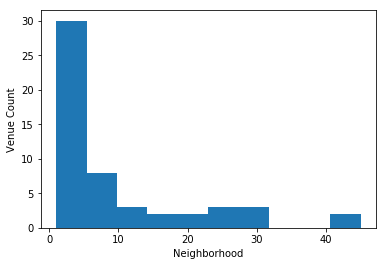

In [258]:
%matplotlib inline
plot=SD_venues["Neighborhood"].value_counts().plot(kind = "hist")
plot.set_xlabel('Neighborhood')
plot.set_ylabel('Venue Count')

In [226]:
print('There are {} uniques categories.'.format(len(SD_venues['Venue Category'].unique())))

There are 161 uniques categories.


### Analysis of Clusters:

In [230]:
# one hot encoding
SD_onehot = pd.get_dummies(SD_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
SD_onehot['Neighborhood'] =SD_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [SD_onehot.columns[-1]] + list(SD_onehot.columns[:-1])
SD_onehot = SD_onehot[fixed_columns]

SD_onehot.head(10)

,Neighborhood,ATM,Accessories Store,Airport,Airport Service,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Dealership,...,Tree,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Yoga Studio
0,Del Mar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Del Mar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Del Mar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Del Mar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Del Mar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Del Mar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Del Mar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Del Mar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Del Mar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Del Mar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [231]:
SD_grouped = SD_onehot.groupby('Neighborhood').mean().reset_index()
SD_grouped

,Neighborhood,ATM,Accessories Store,Airport,Airport Service,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Dealership,...,Tree,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Yoga Studio
0,Alpine,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,Bonita,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,Bonsall,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,Borrego Springs,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,Bostonia,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.0,0.000000,0.000000,0.000000
5,Calavo Gardens,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.0,0.000000,0.000000,0.000000
6,Cardiff-by-the-Sea,0.000000,0.000000,0.0,0.0,0.033333,0.000000,0.00000,0.000000,0.0,...,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
7,Carlsbad,0.000000,0.000000,0.5,0.0,0.000000,0.000000,0.00000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
8,Casa de Oro,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.0,0.000000,0.000000,0.000000
9,Castle Park,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,...,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [232]:
num_top_venues = 5

for neighbourhood in SD_grouped['Neighborhood']:
    print("----"+neighbourhood+"----")
    temp = SD_grouped[SD_grouped['Neighborhood'] == neighbourhood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alpine----
           venue  freq
0           Café   1.0
1            ATM   0.0
2          Motel   0.0
3       Mountain   0.0
4  Movie Theater   0.0


----Bonita----
          venue  freq
0          Park  0.11
1   Coffee Shop  0.11
2  Intersection  0.11
3    Taco Place  0.11
4   Golf Course  0.11


----Bonsall----
              venue  freq
0           Stables   1.0
1               ATM   0.0
2              Pool   0.0
3  Motorsports Shop   0.0
4          Mountain   0.0


----Borrego Springs----
                           venue  freq
0                          Hotel  0.33
1                    Golf Course  0.33
2        New American Restaurant  0.33
3                            ATM  0.00
4  Paper / Office Supplies Store  0.00


----Bostonia----
                venue  freq
0   Convenience Store   0.2
1        Cocktail Bar   0.2
2  Mexican Restaurant   0.2
3         Video Store   0.2
4        Liquor Store   0.2


----Calavo Gardens----
                        venue  freq
0  Construction 

4                Church  0.11


----San Marcos----
                  venue  freq
0          Burger Joint  0.10
1  Fast Food Restaurant  0.10
2                Bakery  0.06
3        Sandwich Place  0.06
4   American Restaurant  0.03


----San Pasqual----
                 venue  freq
0                 Food  0.25
1  American Restaurant  0.25
2             Pharmacy  0.25
3         Liquor Store  0.25
4                  ATM  0.00


----Santee----
                venue  freq
0   Convenience Store   0.2
1          Donut Shop   0.2
2  Mexican Restaurant   0.2
3   Electronics Store   0.2
4    Motorsports Shop   0.2


----Solana Beach----
                  venue  freq
0                   Spa  0.07
1         Grocery Store  0.05
2  Gym / Fitness Center  0.05
3      Department Store  0.05
4        Sandwich Place  0.05


----Spring Valley----
               venue  freq
0               Park  0.29
1        Pizza Place  0.14
2  Martial Arts Dojo  0.14
3     Baseball Field  0.14
4       Liquor Store  0.14

In [233]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [235]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = SD_grouped['Neighborhood']

for ind in np.arange(SD_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(SD_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alpine,Café,Comic Shop,Farm,Falafel Restaurant,Fabric Shop,Eye Doctor,Electronics Store,Donut Shop,Dive Bar,Discount Store
1,Bonita,Coffee Shop,Bank,Golf Course,Park,Juice Bar,Baseball Field,Trail,Taco Place,Intersection,Falafel Restaurant
2,Bonsall,Stables,Yoga Studio,Farmers Market,Falafel Restaurant,Fabric Shop,Eye Doctor,Electronics Store,Donut Shop,Dive Bar,Discount Store
3,Borrego Springs,Golf Course,Hotel,New American Restaurant,Yoga Studio,Discount Store,Falafel Restaurant,Fabric Shop,Eye Doctor,Electronics Store,Donut Shop
4,Bostonia,Convenience Store,Cocktail Bar,Video Store,Liquor Store,Mexican Restaurant,Yoga Studio,Dive Bar,Farm,Falafel Restaurant,Fabric Shop
5,Calavo Gardens,Construction & Landscaping,Convenience Store,Video Store,Liquor Store,Donut Shop,Yoga Studio,Discount Store,Falafel Restaurant,Fabric Shop,Eye Doctor
6,Cardiff-by-the-Sea,Pizza Place,Italian Restaurant,Coffee Shop,Dive Bar,Convenience Store,American Restaurant,Sushi Restaurant,Mexican Restaurant,Liquor Store,Brewery
7,Carlsbad,Airport,Hotel,Yoga Studio,Discount Store,Farm,Falafel Restaurant,Fabric Shop,Eye Doctor,Electronics Store,Donut Shop
8,Casa de Oro,Mexican Restaurant,Pizza Place,Grocery Store,Tailor Shop,Convenience Store,Sandwich Place,Discount Store,Dive Bar,Smoke Shop,Mediterranean Restaurant
9,Castle Park,Fast Food Restaurant,Japanese Restaurant,Pizza Place,Mexican Restaurant,Sushi Restaurant,Pharmacy,Convenience Store,Gas Station,Chinese Restaurant,Dessert Shop


In [244]:
kclusters = 5

SD_grouped_clustering = SD_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(SD_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [245]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

SD_merged = SD_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
SD_merged = SD_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

SD_merged.head() # check the last columns!

,Neighborhood,County,Latitude,Longitude,population,density,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15449,Jacumba Hot Springs,San Diego,32.6278,-116.1827,NaN,631.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15513,Del Mar,San Diego,32.9633,-117.2627,4363.0,986.0,0.0,American Restaurant,Italian Restaurant,Coffee Shop,Hotel Bar,New American Restaurant,Clothing Store,Chinese Restaurant,Motel,Mexican Restaurant,Seafood Restaurant
15557,Rainbow,San Diego,33.4098,-117.1394,NaN,189.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15586,Winter Gardens,San Diego,32.8376,-116.9269,NaN,1428.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15590,Rancho Santa Fe,San Diego,33.0240,-117.1992,NaN,357.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [252]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(SD_merged['Latitude'], SD_merged['Longitude'], SD_merged['Neighborhood'], SD_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow,
        fill=True,
        fill_color=rainbow,
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine clusters:

### Restaurents:

In [253]:
SD_merged.loc[SD_merged['Cluster Labels'] == 0, SD_merged.columns[[1] + list(range(5, SD_merged.shape[1]))]]

,County,density,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15513,San Diego,986.0,0.0,American Restaurant,Italian Restaurant,Coffee Shop,Hotel Bar,New American Restaurant,Clothing Store,Chinese Restaurant,Motel,Mexican Restaurant,Seafood Restaurant
15619,San Diego,6016.4,0.0,Fast Food Restaurant,Japanese Restaurant,Pizza Place,Mexican Restaurant,Sushi Restaurant,Pharmacy,Convenience Store,Gas Station,Chinese Restaurant,Dessert Shop
15637,San Diego,1296.0,0.0,Fast Food Restaurant,Mexican Restaurant,Sandwich Place,Pizza Place,Japanese Restaurant,Health & Beauty Service,Convenience Store,Seafood Restaurant,Salon / Barbershop,Burger Joint
15715,San Diego,1188.0,0.0,Park,Yoga Studio,Discount Store,Farm,Falafel Restaurant,Fabric Shop,Eye Doctor,Electronics Store,Donut Shop,Dive Bar
15775,San Diego,1523.0,0.0,Burger Joint,Fast Food Restaurant,Bakery,Sandwich Place,Shopping Mall,Supermarket,Sporting Goods Shop,Juice Bar,Fabric Shop,Italian Restaurant
15784,San Diego,3254.0,0.0,Taco Place,Auto Dealership,Mexican Restaurant,Convenience Store,Pub,Electronics Store,Fried Chicken Joint,Yoga Studio,Dive Bar,Falafel Restaurant
15792,San Diego,2615.1,0.0,Pool,American Restaurant,Disc Golf,Farm,Falafel Restaurant,Fabric Shop,Eye Doctor,Electronics Store,Donut Shop,Dive Bar
15828,San Diego,2097.0,0.0,Italian Restaurant,Coffee Shop,Yoga Studio,Farm,Falafel Restaurant,Fabric Shop,Eye Doctor,Electronics Store,Donut Shop,Dive Bar
15836,San Diego,22.0,0.0,Golf Course,Hotel,New American Restaurant,Yoga Studio,Discount Store,Falafel Restaurant,Fabric Shop,Eye Doctor,Electronics Store,Donut Shop
15863,San Diego,691.9,0.0,College Basketball Court,Theater,Discount Store,Farm,Falafel Restaurant,Fabric Shop,Eye Doctor,Electronics Store,Donut Shop,Dive Bar


### Stables and Yoga:

In [254]:
SD_merged.loc[SD_merged['Cluster Labels'] == 1, SD_merged.columns[[1] + list(range(5, SD_merged.shape[1]))]]

,County,density,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16589,San Diego,48.7,1.0,Stables,Yoga Studio,Farmers Market,Falafel Restaurant,Fabric Shop,Eye Doctor,Electronics Store,Donut Shop,Dive Bar,Discount Store


### Services:

In [255]:
SD_merged.loc[SD_merged['Cluster Labels'] == 2, SD_merged.columns[[1] + list(range(5, SD_merged.shape[1]))]]

,County,density,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15608,San Diego,2417.9,2.0,Home Service,Business Service,Yoga Studio,Discount Store,Farm,Falafel Restaurant,Fabric Shop,Eye Doctor,Electronics Store,Donut Shop
16932,San Diego,494.0,2.0,Business Service,Yoga Studio,Comic Shop,Farm,Falafel Restaurant,Fabric Shop,Eye Doctor,Electronics Store,Donut Shop,Dive Bar


### Markets:

In [256]:
SD_merged.loc[SD_merged['Cluster Labels'] == 3, SD_merged.columns[[1] + list(range(5, SD_merged.shape[1]))]]

,County,density,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16638,San Diego,1667.3,3.0,Flea Market,Yoga Studio,Farmers Market,Falafel Restaurant,Fabric Shop,Eye Doctor,Electronics Store,Donut Shop,Dive Bar,Discount Store


## San Diego Demographics:

In [11]:
## https://en.wikipedia.org/wiki/San_Diego
import requests
import pandas as pd
from bs4 import BeautifulSoup # package for parsing HTML and XML documents

import csv # implements classes to read and write tabular data in CSV form

print('Libraries imported.')

Libraries imported.


In [9]:
website_url = requests.get('https://en.wikipedia.org/wiki/San_Diego').text
soup = BeautifulSoup(website_url,'lxml')
table = soup.find('table',{'class':'wikitable sortable collapsible'})
#print(soup.prettify())

headers = [header.text for header in table.find_all('th')]

table_rows = table.find_all('tr')        
rows = []
for row in table_rows:
   td = row.find_all('td')
   row = [row.text for row in td]
   rows.append(row)

with open('SD_Demographics.csv', 'w') as f:
   writer = csv.writer(f)
   writer.writerow(headers)
   writer.writerows(row for row in rows if row)

In [19]:
sd_demo_data=pd.read_csv('SD_Demographics.csv')
print('Data loaded!')

Data loaded!


In [20]:
sd_demo_data.columns

Index(['Racial composition', '2010[97]', '1990[98]', '1970[98]', '1940[98]\n'], dtype='object')

In [21]:
sd_demo_data.rename(columns = {'2010[97]' : '2010',
                   '1990[98]':'1990',
                   '1970[98]':'1970', 
                   '1940[98]\n':'1940',
                    }, inplace=True)
sd_demo_data

,Racial composition,2010,1990,1970,1940
0,White,58.9%,67.1%,88.9%,96.9%\n
1,—Non-Hispanic,45.1%,58.7%,78.9%[99],n/a\n
2,Black or African American,6.7%,9.4%,7.6%,2.0%\n
3,Hispanic or Latino (of any race),28.8%,20.7%,10.7%[99],n/a\n
4,Asian,15.9%,11.8%,2.2%,1.0%\n


In [22]:

sd_demo_data= sd_demo_data.replace('\n',' ', regex=True)
sd_demo_data

,Racial composition,2010,1990,1970,1940
0,White,58.9%,67.1%,88.9%,96.9%
1,—Non-Hispanic,45.1%,58.7%,78.9%[99],n/a
2,Black or African American,6.7%,9.4%,7.6%,2.0%
3,Hispanic or Latino (of any race),28.8%,20.7%,10.7%[99],n/a
4,Asian,15.9%,11.8%,2.2%,1.0%


### San Diego Crime Analysis:

In [46]:
sd_crime_data= pd.read_csv('SDCrimeData071019.csv', header=0,encoding = 'unicode_escape')
print("Data Loaded!")

Data Loaded!


In [47]:
sd_crime_data.head()

,CM_LEGEND,agency,Charge_Description_Orig,activityDate,BLOCK_ADDRESS,ZipCode,community
0,DRUGS/ALCOHOL VIOLATIONS,SHERIFF,SELL LIQUOR TO MINOR (M),3/9/2019 16:40:00,300 S BLOCK SANTA FE AVENUE,92083.0,VISTA
1,THEFT/LARCENY,NATIONAL CITY,BURGLARY (SHOPLIFTING) (F),3/22/2019 10:42:00,3000 BLOCK PLAZA BONITA ROAD,91950.0,NATIONAL CITY
2,THEFT/LARCENY,NATIONAL CITY,PETTY THEFT(All Other Larceny) (M),2/6/2019 22:00:00,1300 E BLOCK 04TH STREET,91950.0,NATIONAL CITY
3,VEHICLE BREAK-IN/THEFT,NATIONAL CITY,PETTY THEFT(from Veh) (M),2/27/2019 9:00:00,3000 BLOCK PLAZA BONITA ROAD,91950.0,NATIONAL CITY
4,ASSAULT,NATIONAL CITY,CAUSE HARM/DEATH OF ELDER /DEPENDENT ADULT (F),3/3/2019 17:41:00,2000 BLOCK HIGHLAND AVENUE,91950.0,NATIONAL CITY


In [48]:
sd_crime_data.shape

(58125, 7)

In [53]:
sd_crime_data.rename(columns={'CM_LEGEND': 'Crime','agency': 'Agency', 'Charge_Description_Orig':'Description', 'activityDate':'Date', 'BLOCK_ADDRESS': 'Address'}, inplace=True)
sd_crime_data.head()

,Crime,Agency,Description,Date,Address,ZipCode,community
0,DRUGS/ALCOHOL VIOLATIONS,SHERIFF,SELL LIQUOR TO MINOR (M),3/9/2019 16:40:00,300 S BLOCK SANTA FE AVENUE,92083.0,VISTA
1,THEFT/LARCENY,NATIONAL CITY,BURGLARY (SHOPLIFTING) (F),3/22/2019 10:42:00,3000 BLOCK PLAZA BONITA ROAD,91950.0,NATIONAL CITY
2,THEFT/LARCENY,NATIONAL CITY,PETTY THEFT(All Other Larceny) (M),2/6/2019 22:00:00,1300 E BLOCK 04TH STREET,91950.0,NATIONAL CITY
3,VEHICLE BREAK-IN/THEFT,NATIONAL CITY,PETTY THEFT(from Veh) (M),2/27/2019 9:00:00,3000 BLOCK PLAZA BONITA ROAD,91950.0,NATIONAL CITY
4,ASSAULT,NATIONAL CITY,CAUSE HARM/DEATH OF ELDER /DEPENDENT ADULT (F),3/3/2019 17:41:00,2000 BLOCK HIGHLAND AVENUE,91950.0,NATIONAL CITY


In [62]:
crime_counts= sd_crime_data.groupby('Crime').count()
crime_counts.reset_index()

,Crime,Agency,Description,Date,Address,ZipCode,community
0,ARSON,117,117,117,117,112,111
1,ASSAULT,7211,7211,7211,7211,7163,7098
2,BURGLARY,3469,3469,3469,3469,3455,3430
3,DRUGS/ALCOHOL VIOLATIONS,14041,14040,14041,14041,13665,13451
4,DUI,2160,2160,2160,2160,2124,2025
5,FRAUD,2854,2854,2854,2854,2814,2786
6,HOMICIDE,33,33,33,33,33,31
7,MOTOR VEHICLE THEFT,4384,4384,4384,4384,4274,4234
8,ROBBERY,1315,1315,1315,1315,1308,1288
9,SEX CRIMES,1141,1141,1141,1141,1127,1103


In [64]:
crime_counts

,Agency,Description,Date,Address,ZipCode,community
Crime,,,,,,
ARSON,117,117,117,117,112,111
ASSAULT,7211,7211,7211,7211,7163,7098
BURGLARY,3469,3469,3469,3469,3455,3430
DRUGS/ALCOHOL VIOLATIONS,14041,14040,14041,14041,13665,13451
DUI,2160,2160,2160,2160,2124,2025
FRAUD,2854,2854,2854,2854,2814,2786
HOMICIDE,33,33,33,33,33,31
MOTOR VEHICLE THEFT,4384,4384,4384,4384,4274,4234
ROBBERY,1315,1315,1315,1315,1308,1288


Text(0, 0.5, 'Counts')

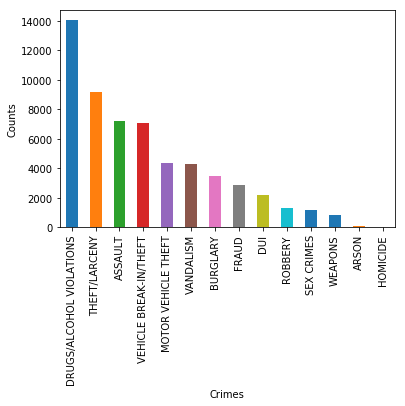

In [65]:
%matplotlib inline

plot_Crime = sd_crime_data["Crime"].value_counts().plot(kind = "bar")
plot_Crime.set_xlabel('Crimes')
plot_Crime.set_ylabel('Counts')